# **EDA del Proyecto 1: MLOps**

#### Importamos Librerias 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

## Buscando nulos y duplicados

#### **Parte Steam_games**

Abrimos el archivo 'steam_games.parquet'

In [2]:
df_games = pd.read_parquet(".\datasets\steam_games.parquet")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28851 non-null  object
 1   app_name      32133 non-null  object
 2   release_date  30067 non-null  object
 3   price         32133 non-null  object
 4   item_id       32133 non-null  int32 
 5   developer     28836 non-null  object
dtypes: int32(1), object(5)
memory usage: 1.3+ MB


In [3]:
df_games.head(4)

,genres,app_name,release_date,price,item_id,developer
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,free,643980,Secret Level SRL
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,free,670290,Poolians.com
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400,彼岸领域


### **Tomaremos acción contra los nulos del dataframe**

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28851 non-null  object
 1   app_name      32133 non-null  object
 2   release_date  30067 non-null  object
 3   price         32133 non-null  object
 4   item_id       32133 non-null  int32 
 5   developer     28836 non-null  object
dtypes: int32(1), object(5)
memory usage: 1.3+ MB


In [5]:
df_games["genres"] = df_games["genres"].fillna("Sin Dato")

df_games["release_date"] = df_games["release_date"].fillna("Sin Dato")

df_games["price"] = df_games["price"].fillna("Sin Dato")

df_games["developer"] = df_games["developer"].fillna("Sin Dato")

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        32133 non-null  object
 1   app_name      32133 non-null  object
 2   release_date  32133 non-null  object
 3   price         32133 non-null  object
 4   item_id       32133 non-null  int32 
 5   developer     32133 non-null  object
dtypes: int32(1), object(5)
memory usage: 1.3+ MB


Intentamos ver si hay duplicados en las columnas

In [6]:
df_games[df_games.duplicated(subset="app_name", keep=False)].sort_values(by="app_name").head(4)

,genres,app_name,release_date,price,item_id,developer
30545,"[Action, Free to Play, Indie, Strategy]",AirMech® Soundtrack,2012-11-13,9.99,216173,Carbon Games
18846,Sin Dato,AirMech® Soundtrack,Sin Dato,9.99,599520,Sin Dato
30177,[Action],Aliens: Colonial Marines - Reconnaissance Pack,2013-05-07,29.99,219441,Gearbox Software
30176,[Action],Aliens: Colonial Marines - Reconnaissance Pack,2013-05-07,nan,224850,Gearbox Software


In [7]:
df_games[df_games.duplicated(subset="app_name", keep=False)].sort_values(by="app_name").tail(4)

,genres,app_name,release_date,price,item_id,developer
27669,"[RPG, Strategy]",Warhammer Quest,2015-01-07,nan,329270,"Twistplay,Rodeo Games"
27670,"[RPG, Strategy]",Warhammer Quest,2015-01-07,14.99,326670,"Rodeo Games,Twistplay"
13892,[Action],Wolfenstein II: The New Colossus,2017-10-26,59.99,612880,Machine Games
14571,[Action],Wolfenstein II: The New Colossus,2017-10-26,59.99,612880,Machine Games


Aunque hay algunos registros que son claramente duplicados, otros que son más inciertos se dejaran para  
no perder información

In [8]:
eliminar_dup = [13892, 18846, 30176, 1067, 1508, 27669] # indices de los duplicados obvios

df_games = df_games.drop(eliminar_dup)

Como vemos en la siguiente celda, ya no se encuentran los mismos datos:

In [9]:
df_games[df_games.duplicated(subset="app_name", keep=False)].sort_values(by="app_name")

,genres,app_name,release_date,price,item_id,developer
31401,[Adventure],Alter Ego,2010-08-03,9.99,63110,bitComposer Games
10911,"[Adventure, Casual, Indie, RPG, Simulation]",Alter Ego,1986-05-01,7.99,664780,Choose Multiple LLC
31540,"[Action, Free to Play, Indie]",Altitude,2009-12-04,free,41300,Nimbly Games
18194,Sin Dato,Altitude,2017-04-14,4.99,620010,Sin Dato
16453,Sin Dato,Archangel,Sin Dato,29.99,553880,Sin Dato
...,...,...,...,...,...,...
27087,"[Simulation, Sports]",Total Extreme Wrestling,2015-03-19,19.99,344810,Grey Dog Software
21898,[Simulation],Ultimate Arena,2016-08-22,2.99,385240,Triverske
21697,"[Action, Indie]",Ultimate Arena,2016-09-05,11.15,436260,"Kenneth Caselli,Gianmarco Rocco"
6580,"[Action, Indie]",WARZONE,2016-07-11,2.99,494290,"NFA,Claw Games"


Vemos si hay duplicados en la columna id_item:

In [10]:
df_games[df_games.duplicated(subset="item_id", keep=False)]

,genres,app_name,release_date,price,item_id,developer


#### **Parte user_reviews**

Abrimos el archivo 'user_reviews_sentiment.parquet'

In [11]:
df_reviews = pd.read_parquet("./datasets_endpoints/user_reviews_sentiment.parquet")
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58458 entries, 0 to 58457
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58458 non-null  object
 1   item_id             58430 non-null  object
 2   recommend           58430 non-null  object
 3   sentimemt_analysis  58458 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


Observamos que la columna 'item_id' esta en el tipo de dato equivocado (object), ahora lo pasaremos a int  
Pero primero tendremos de encangarnos de los nulos (NaN) que tiene:

In [12]:
df_reviews[df_reviews["item_id"].isna()]

,user_id,item_id,recommend,sentimemt_analysis
137,gdxsd,None,None,1
177,76561198094224872,None,None,1
2558,76561198021575394,None,None,1
9956,cmuir37,None,None,1
13528,Jaysteeny,None,None,1
15212,ML8989,None,None,1
18792,76561198079215291,None,None,1
19784,76561198079342142,None,None,1
24521,76561198061996985,None,None,1
25715,76561198108286351,None,None,1


Debido a que estos registros carecen de información, los considero inútiles y procedo a eliminarlos:

In [13]:
df_reviews = df_reviews.dropna(subset=['item_id'])

In [14]:
df_reviews[df_reviews["item_id"].isna()]

,user_id,item_id,recommend,sentimemt_analysis


In [15]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58430 entries, 0 to 58457
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58430 non-null  object
 1   item_id             58430 non-null  object
 2   recommend           58430 non-null  object
 3   sentimemt_analysis  58430 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


Ahora si cambio el tipo de dato de item_id por int

In [16]:
df_reviews.insert(1, "id_item", df_reviews["item_id"].astype(int))
df_reviews.head(5)

,user_id,id_item,item_id,recommend,sentimemt_analysis
0,76561197970982479,1250,1250,True,2
1,76561197970982479,22200,22200,True,2
2,76561197970982479,43110,43110,True,2
3,js41637,251610,251610,True,2
4,js41637,227300,227300,True,2


Elimino la columna item_id, ya que sobra

In [17]:
df_reviews = df_reviews.drop("item_id", axis=1)

In [18]:
df_reviews = df_reviews.reset_index(drop=True)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58430 non-null  object
 1   id_item             58430 non-null  int32 
 2   recommend           58430 non-null  object
 3   sentimemt_analysis  58430 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


#### **Parte user_items**

Abrimos el archivo 'user_reviews_sentiment.parquet'

In [19]:
df_items = pd.read_parquet("./datasets/user_items.parquet")
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110796 entries, 0 to 5110795
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          object 
 3   item_id           object 
 4   playtime_forever  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.0+ MB


### Buscamos nulos en cada columna

In [20]:
df_items[df_items["user_id"].isnull()]

,user_id,items_count,steam_id,item_id,playtime_forever


In [21]:
df_items[df_items["items_count"].isnull()]

,user_id,items_count,steam_id,item_id,playtime_forever


In [22]:
df_items[df_items["steam_id"].isnull()]

,user_id,items_count,steam_id,item_id,playtime_forever


In [23]:
df_items[df_items["item_id"].isnull()]

,user_id,items_count,steam_id,item_id,playtime_forever
3733,Wackky,0,76561198039117046,None,NaN
3849,76561198079601835,0,76561198079601835,None,NaN
6019,hellom8o,0,76561198117222320,None,NaN
6523,starkillershadow553,0,76561198059648579,None,NaN
7237,darkenkane,0,76561198058876001,None,NaN
...,...,...,...,...,...
5110251,76561198316380182,0,76561198316380182,None,NaN
5110252,76561198316970597,0,76561198316970597,None,NaN
5110253,76561198318100691,0,76561198318100691,None,NaN
5110787,XxLaughingJackClown77xX,0,76561198328759259,None,NaN


In [24]:
df_items[df_items["playtime_forever"].isnull()]

,user_id,items_count,steam_id,item_id,playtime_forever
3733,Wackky,0,76561198039117046,None,NaN
3849,76561198079601835,0,76561198079601835,None,NaN
6019,hellom8o,0,76561198117222320,None,NaN
6523,starkillershadow553,0,76561198059648579,None,NaN
7237,darkenkane,0,76561198058876001,None,NaN
...,...,...,...,...,...
5110251,76561198316380182,0,76561198316380182,None,NaN
5110252,76561198316970597,0,76561198316970597,None,NaN
5110253,76561198318100691,0,76561198318100691,None,NaN
5110787,XxLaughingJackClown77xX,0,76561198328759259,None,NaN


Como vemos hay usuarios que no poseen ningún item y por lo tanto no tienen horas jugadas  
Pero como no me gusta tener NaN's, voy a cambiarlos por un cero

In [25]:
df_items['item_id'] = df_items['item_id'].fillna(0)
df_items['playtime_forever'] = df_items['playtime_forever'].fillna(0)

In [26]:
df_items[df_items["item_id"].isnull()] # vemos el resultado

,user_id,items_count,steam_id,item_id,playtime_forever


In [27]:
df_items[df_items["playtime_forever"].isnull()] # vemos el resultado

,user_id,items_count,steam_id,item_id,playtime_forever


## **Gráficos**

#### **Nube de Palabras**  
Creo una copia del dataframe de steam_games para trabajar de manera segura, sin afectar el original

In [28]:
df_games_nube = df_games.copy()

Convierto en un string los elemento de la columna 'genres'

In [29]:
df_games_nube['genres'] = df_games_nube['genres'].astype(str)
texto = ' '.join(df_games_nube['genres'])

Se normaliza todas la palabras del str texto quitanto mayusculas y caracteres especiales

In [30]:
texto = texto.lower()

def caracteres_especiales(texto):
    return re.sub(r'[^a-zA-Z0-9\s]', '', texto)
texto = caracteres_especiales(texto)
texto

'action casual indie simulation strategy free to play indie rpg strategy casual free to play indie simulation sports action adventure casual sin dato action adventure simulation free to play indie simulation sports free to play indie simulation sports free to play indie simulation sports casual indie racing simulation action indie simulation early access sin dato action adventure casual indie rpg casual indie casual indie simulation adventure casual indie simulation strategy free to play indie simulation sports adventure casual indie simulation strategy free to play indie simulation sports sin dato sin dato action adventure indie sin dato racing simulation sports racing simulation sports action indie sin dato action indie racing action action indie rpg sin dato casual indie strategy action casual indie simulation action casual indie massively multiplayer simulation sports\n strategy adventure casual indie sin dato action adventure rpg adventure casual indie rpg strategy strategy action

**Gráfico de Nube**

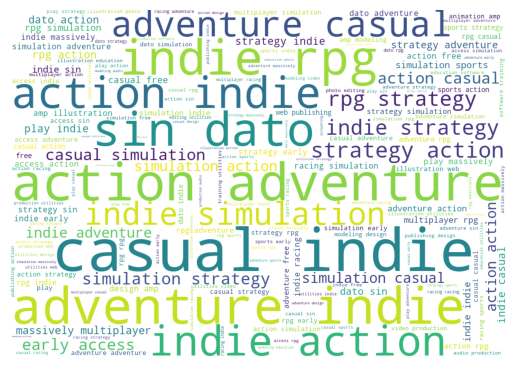

In [31]:
nube_de_palabras = WordCloud(width=1000, height=700,  background_color='white').generate(texto)
plt.imshow(nube_de_palabras)
plt.axis('off')
plt.show()

**Gráfico de tiempo jugado**

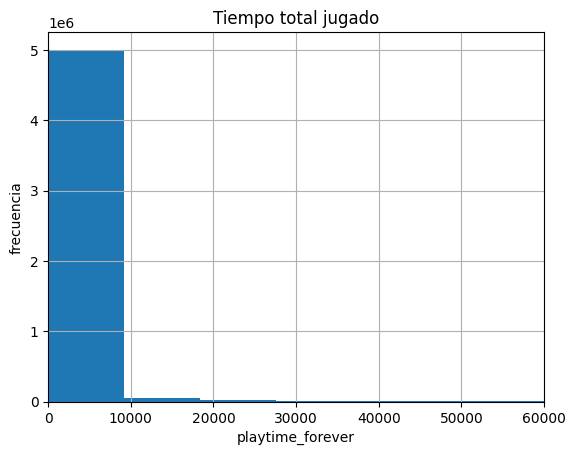

In [32]:
df_items['playtime_forever'].hist(bins=70)
plt.xlim(0, 60000)
plt.title('Tiempo total jugado')
plt.xlabel('playtime_forever')
plt.ylabel('frecuencia')
plt.show()

Con este gráfico podemos concluir que la mayoría de los jugadores no estan por encima de las 10-15 mil  
horas en un item, por lo tanto cualquier jugador que sume más es un outlier

In [33]:
df_items[df_items["playtime_forever"] > 15000]

,user_id,items_count,steam_id,item_id,playtime_forever
178,76561197970982479,277,76561197970982479,730,23532.0
1301,evcentric,137,76561198007712555,466170,28545.0
1354,Riot-Punch,328,76561197963445855,12210,52062.0
1361,Riot-Punch,328,76561197963445855,21660,23903.0
1907,doctr,541,76561198002099482,730,19800.0
...,...,...,...,...,...
5108374,76561198284994428,63,76561198284994428,304930,17586.0
5108530,sexyawp,9,76561198293486792,730,29789.0
5108654,tarik22,2,76561198294894249,730,16635.0
5110137,76561198304604920,11,76561198304604920,304930,20201.0


En el siguiente dataframe filtrado se ve un situación imposible, debido a que la plataforma steam se abrió el 12 de septiembre de 2003 y de esa fecha a la fecha de hoy han transcurrido casi 21 años (+ 180.000 horas), debido a eso, todos los registros que superen esa cantida son un error.

In [34]:
df_items[df_items["playtime_forever"] > 180000]

,user_id,items_count,steam_id,item_id,playtime_forever
4647,thequeenpanda,524,76561198010803705,4000,255613.0
5171,death-hunter,121,76561198018556265,4000,243840.0
6836,wirlom,50,76561198096285145,550,184933.0
9017,76561198078738103,33,76561198078738103,4000,303466.0
17414,76561197990792016,113,76561197990792016,730,189556.0
...,...,...,...,...,...
4946999,76561198088238670,123,76561198088238670,4000,193520.0
4970875,76561198090486706,44,76561198090486706,226320,231136.0
5065838,76561198111731944,5,76561198111731944,243870,278011.0
5089857,talibanstorm,16,76561198137551215,730,201190.0


**Gráfico de Items**

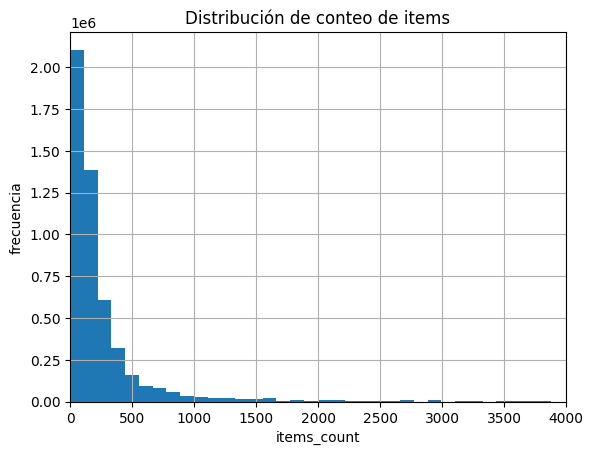

In [35]:
df_items['items_count'].hist(bins=70)
plt.xlim(0, 4000)
plt.title('Distribución de conteo de items')
plt.xlabel('items_count')
plt.ylabel('frecuencia')
plt.show()

Con este gráfico podemos concluir que la mayoría de jugadores están por debajo de los 500 items, considerando los jugadores  
con más de mil items como outliers

**Gráfico Análisis de Sentimiento**

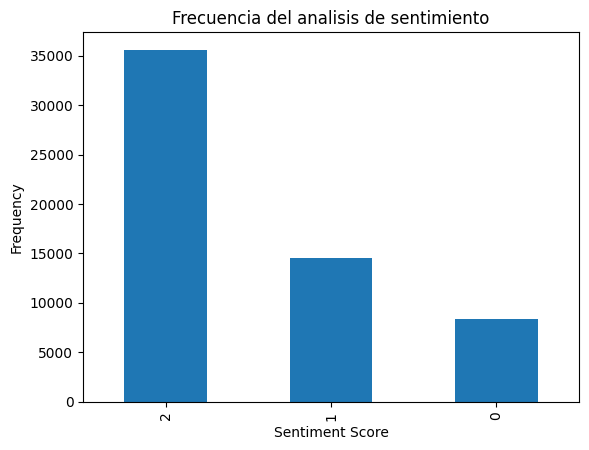

In [36]:
df_reviews['sentimemt_analysis'].value_counts().plot(kind='bar')
plt.title('Frecuencia del analisis de sentimiento')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Este gráfico demuestra que los jugadores tienden a valorar positivamente los items que obtienen

### **Análisis multivariado**  
Primero debemos crear una tabla de dummies para los generos de los juegos de steam

In [52]:
df_games_copy = df_games.copy()

In [58]:
df_games_copy.head(7)

,genres,app_name,release_date,price,item_id,developer
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,free,643980,Secret Level SRL
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,free,670290,Poolians.com
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400,彼岸领域
4,Sin Dato,Log Challenge,Sin Dato,2.99,773570,Sin Dato
5,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd
6,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,2018-01-04,9.99,774276,Poppermost Productions


In [57]:
# Define una función para convertir arrays de NumPy a listas
def convertir_a_lista(valor):
    if isinstance(valor, np.ndarray):
        return valor.tolist()
    else:
        return valor

# Aplica la función a la columna 'genres' para convertir los arrays de NumPy a listas
df_games_copy['genres'] = df_games_copy['genres'].apply(convertir_a_lista)

# Filtra los elementos que no son 'Sin Dato' en la columna 'genres'
df_sin_dato = df_games_copy[df_games_copy['genres'].apply(lambda x: x != 'Sin Dato')]
df_sin_dato.head(5)

,genres,app_name,release_date,price,item_id,developer
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,free,643980,Secret Level SRL
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,free,670290,Poolians.com
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400,彼岸领域
5,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd


Creamos las columnas dummies

In [62]:
if not df_sin_dato.empty:
    df_sin_dato['genres_str'] = df_sin_dato['genres'].apply(lambda x: ','.join(x))
    dummies = df_sin_dato['genres_str'].str.get_dummies(sep=',')
    
    # Concatena las columnas binarias con el DataFrame original
    df_dummies = pd.concat([df_sin_dato, dummies], axis=1)
    
    # Elimina la columna 'genres_str' si ya no la necesitas
    df_dummies.drop(columns=['genres_str'], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2960\1958069582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_dato['genres_str'] = df_sin_dato['genres'].apply(lambda x: ','.join(x))


Comprobamos el resultado:

In [64]:
df_dummies.head(3)

,genres,app_name,release_date,price,item_id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,free,643980,Secret Level SRL,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,free,670290,Poolians.com,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


Eliminamos la columna 'genres' ya que es innecesaria:

In [65]:
df_dummies = df_dummies.drop("genres", axis=1)

Hacemos una copia, borramos columnas y graficamos:

In [71]:
df_dummies_copy = df_dummies.copy()

# borramos columna innecesarias
drops_cols = ["app_name", "release_date",	"price", "developer"]
df_dummies_copy = df_dummies_copy.drop(drops_cols, axis=1)
df_dummies_copy.head(3)

,item_id,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,761140,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,643980,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,670290,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [74]:
df_reviews_copy = df_reviews.copy()
df_reviews_copy = df_reviews_copy.rename(columns={"id_item":"item_id"})

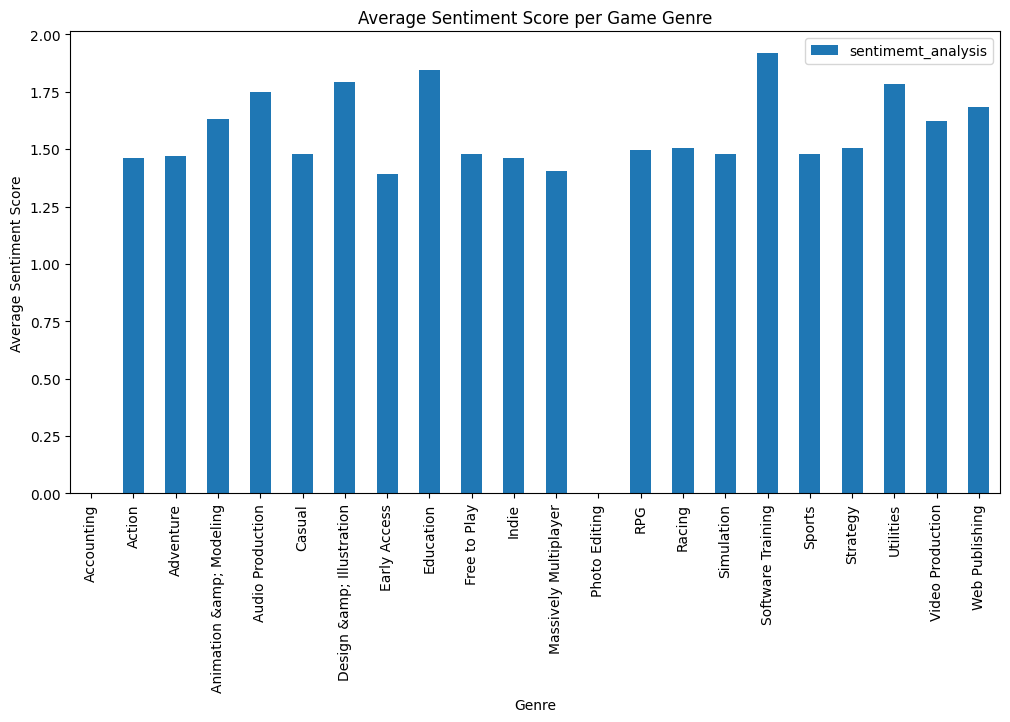

In [77]:
df_genre_reviews = pd.merge(df_dummies_copy, df_reviews_copy, on='item_id' )

genre_columns = df_dummies_copy.columns[1:]  
avg_sentiment_per_genre = {genre: df_genre_reviews[df_genre_reviews[genre] == 1]['sentimemt_analysis'].mean() for genre in genre_columns}

avg_sentiment_df = pd.DataFrame(list(avg_sentiment_per_genre.items()), columns=['Genre', 'sentimemt_analysis'])

avg_sentiment_df.plot(x='Genre', y='sentimemt_analysis', kind='bar', figsize=(12, 6))
plt.title('Average Sentiment Score per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.show()

## **Cargamos a parquet el dataframe de dummies (de Steam_Games)**

In [79]:
df_dummies.to_parquet("./datasets_endpoints/games_genre_dummies.parquet")